# CNN with Padding _ Batch Normalization

### Step 0: Imports and Setup

In [11]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings('ignore')

### Step 1: Load and Preprocessing of Data

In [12]:
# MNIST
(x_train_mnist, y_train_mnist),(x_test_mnist, y_test_mnist) = tf.keras.datasets.mnist.load_data()
x_train_mnist = np.expand_dims(x_train_mnist, -1).astype('float32')/255.0
x_test_mnist = np.expand_dims(x_test_mnist, -1).astype('float32')/255.0

# Fashion-mnist
(x_train_fm, y_train_fm), (x_test_fm, y_test_fm) = tf.keras.datasets.fashion_mnist.load_data()
x_train_fm = np.expand_dims(x_train_fm, -1).astype('float32')/255.0
x_test_fm = np.expand_dims(x_test_fm, -1).astype('float32')/255.0

# CIFAR-10
(x_train_cifar,y_train_cifar),(x_test_cifar, y_test_cifar) = tf.keras.datasets.cifar10.load_data()
x_train_cifar = x_train_cifar.astype('float32')/255.0
x_test_cifar = x_test_cifar.astype('float32')/255.0

# Flatten the targets
y_train_cifar = y_train_cifar.flatten()
y_test_cifar = y_test_cifar.flatten()

### Step 2: Model Definition
- CNN model with Padding + Normalization

In [13]:
def build_cnn(input_shape, num_classes):
    model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(32, (3,3), activation='relu', padding='same', input_shape=input_shape),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D((2,2)),

        tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding='same'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D((2,2)),

        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(num_classes, activation='softmax')
    ])
    return model

#### Initialized Models

In [14]:
model_mnist = build_cnn((28,28,1), 10)
model_fm = build_cnn((28,28,1), 10)
model_cifar = build_cnn((32, 32, 3), 10)

# Step 3: Compile Model

In [15]:
# Mnist
model_mnist.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


### Step 4: Train the Model

In [16]:
history_mnist = model_mnist.fit(
    x_train_mnist, y_train_mnist,
    epochs=10,
    batch_size=128,
    validation_split=.1,
    verbose=2
)

Epoch 1/10
422/422 - 9s - 21ms/step - accuracy: 0.9690 - loss: 0.1027 - val_accuracy: 0.6003 - val_loss: 1.0600
Epoch 2/10
422/422 - 2s - 5ms/step - accuracy: 0.9893 - loss: 0.0358 - val_accuracy: 0.9845 - val_loss: 0.0496
Epoch 3/10
422/422 - 2s - 5ms/step - accuracy: 0.9936 - loss: 0.0222 - val_accuracy: 0.9867 - val_loss: 0.0442
Epoch 4/10
422/422 - 2s - 5ms/step - accuracy: 0.9960 - loss: 0.0138 - val_accuracy: 0.9850 - val_loss: 0.0497
Epoch 5/10
422/422 - 2s - 5ms/step - accuracy: 0.9974 - loss: 0.0092 - val_accuracy: 0.9882 - val_loss: 0.0480
Epoch 6/10
422/422 - 2s - 5ms/step - accuracy: 0.9974 - loss: 0.0089 - val_accuracy: 0.9868 - val_loss: 0.0514
Epoch 7/10
422/422 - 2s - 5ms/step - accuracy: 0.9974 - loss: 0.0082 - val_accuracy: 0.9887 - val_loss: 0.0419
Epoch 8/10
422/422 - 2s - 5ms/step - accuracy: 0.9980 - loss: 0.0066 - val_accuracy: 0.9890 - val_loss: 0.0427
Epoch 9/10
422/422 - 2s - 5ms/step - accuracy: 0.9989 - loss: 0.0037 - val_accuracy: 0.9913 - val_loss: 0.0387


### Step 5: Evaluate & Record Accuracy

In [17]:
loss, acc = model_mnist.evaluate(x_test_mnist, y_test_mnist, verbose=0)
print(f"Test Accuracy: {acc}, Loss: {loss}")

Test Accuracy: 0.9886999726295471, Loss: 0.0397387333214283


### Step 6: Plot Accuracy per Epoch

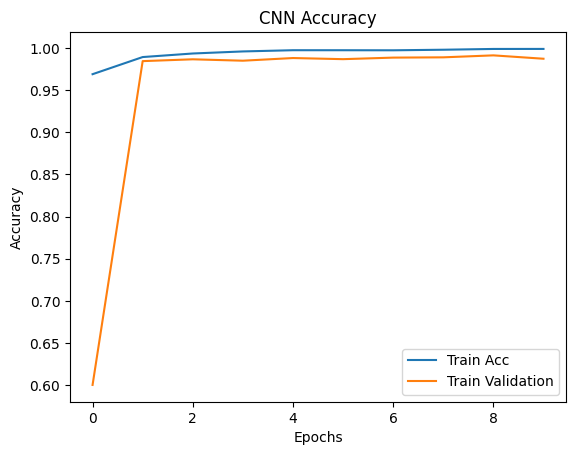

In [19]:
plt.plot(history_mnist.history['accuracy'], label='Train Acc')
plt.plot(history_mnist.history['val_accuracy'], label='Train Validation')
plt.xlabel('Epochs'); plt.ylabel('Accuracy');plt.title('CNN Accuracy')
plt.legend()
plt.show()

### Notes
* Padding="Same"
  - This keeps feature maps from shrinking too fast (important for deeper CNNs)
* BatchNorm
  - Stabilizes activation, reduces internal covariate shift, allows higer learning
    rates